## 完全手写一个简易DenseNet

In [1]:
from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf

## 定义Dense模块

In [2]:
def dense_block(x, filter_num, kernel_size):
    last_input_shape = x.shape[-1]
    
    conv1 = Conv2D(filters=filter_num, kernel_size=kernel_size, padding='same')(x)
    conv2 = Conv2D(filters=last_input_shape, kernel_size=kernel_size, padding='same')(conv1)
    add_layer = Add()([conv2, x])
    max_layer = MaxPooling2D()(add_layer)

    return max_layer

## 模型主体

In [3]:
input_layer = Input(shape=(224, 224, 3))

dense_1 = dense_block(input_layer, 32, 3)
dense_2 = dense_block(dense_1, 64, 3)

In [4]:
model = Model(inputs=input_layer, outputs=dense_2)

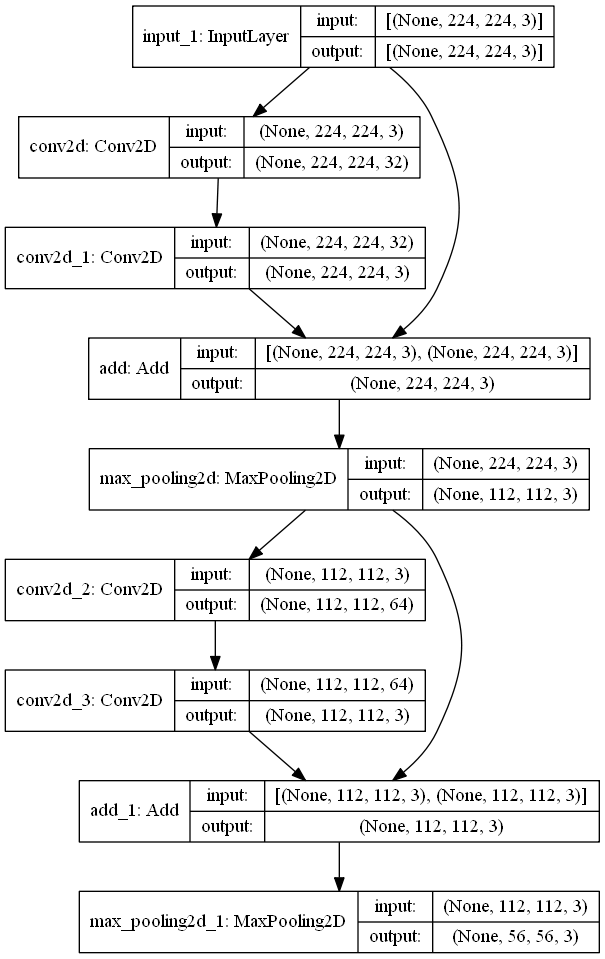

In [5]:
plot_model(model, show_shapes=True)